<a href="https://colab.research.google.com/github/nufarsa/homicide/blob/main/P146223UKM_Homicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Analysis On Person Who Attempted / Suspected With Homicide**

**Introduction :**
The statistical definition contains three elements that characterize the killing of a person as 'intentional homicide':
1. The killing of a person by another person (objective element).
2. The intent of the perpetrator to kill or seriously injure the victim (subjective element).
3. The unlawfulness of the killing (legal element)

I take this character no 1 as my analysis in this project. The data also include the Gender, Region , Countryas well as Age group

**Problem Statment:**
The focus is on the objective element, which strictly involves the individuals who attempted/suspected to killing person. I want to see which target age group and country I as a representative analyst of United Nation (UN) to focus on the campaign of zero crimes.  


**Results & Discussion**: The project generate visualizations and insights to highlight trends, disparities, and patterns in the data related to intentional homicides. Every of the visualization has its own analysis

**Sources:** Data are collected from national authorities through the annual United Crimes Trends' Survey (UN-CTS). Source : [UNDOC](https://dataunodc.un.org/dp-intentional-homicide-offenders)

**Data Loading & Storage**

In [2]:
# Check where file being uploaded
# pwd -> "present working directory"
!pwd

/content


In [4]:
# Import the library
import pandas as pd
import numpy as np

In [5]:
# Read using the excel table function
homicide = pd.read_excel('/content/data_cts_intentional_homicide.xlsx')
print(homicide.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  Total Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


**Check For Missing Data Within The Dataset**

In [ ]:
# Save the dataframe to a CSV file
csv_file = 'intentional_homicide.csv'
homicide.to_csv(csv_file, index=False)
print(homicide.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  Total Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


In [ ]:
homicide_new = pd.read_csv('intentional_homicide.csv')
print(homicide_new.head(2))

  Iso3_code      Country  Region       Subregion  \
0       ARM      Armenia    Asia    Western Asia   
1       CHE  Switzerland  Europe  Western Europe   

                                           Indicator       Dimension  \
0  Persons arrested/suspected for intentional hom...  by citizenship   
1  Persons arrested/suspected for intentional hom...  by citizenship   

            Category   Sex    Age  Year Unit of measurement  Total Source  
0  National citizens  Male  Total  2013              Counts   35.0    CTS  
1  National citizens  Male  Total  2013              Counts   28.0    CTS  


In [ ]:
# Check for missing data
missing_data = homicide_new.isnull().sum()

# Print the summary of missing data
print("Summary of missing data:", missing_data)

Summary of missing data: Iso3_code              0
Country                4
Region                 4
Subregion              4
Indicator              0
Dimension              0
Category               0
Sex                    0
Age                    0
Year                   0
Unit of measurement    0
Total                  0
Source                 0
dtype: int64


In [ ]:
# Check structure of the data
# Checking unique data for each column
for column in homicide_new.columns:
    unique_values = homicide_new[column].unique()
    print(column, unique_values)

Iso3_code ['ARM' 'CHE' 'COL' 'CZE' 'DEU' 'FIN' 'GTM' 'HND' 'HUN' 'ISL' 'ITA' 'JPN'
 'LKA' 'LTU' 'MNG' 'NOR' 'SRB' 'SVK' 'SVN' 'TUR' 'ATG' 'AUT' 'BEL' 'BLZ'
 'BOL' 'BTN' 'DNK' 'FRA' 'GRC' 'MAC' 'RUS' 'UZB' 'ALB' 'AZE' 'BRB' 'CHL'
 'ESP' 'GRD' 'GUY' 'HRV' 'LIE' 'LVA' 'MNE' 'PAN' 'DMA' 'JOR' 'KNA' 'LCA'
 'MEX' 'MLT' 'OMN' 'TTO' 'BGR' 'BHS' 'CAN' 'CRI' 'DOM' 'SLV' 'URY' 'BIH'
 'VCT' 'ECU' 'VAT' 'IDN' 'MAR' 'MUS' 'ABW' 'AIA' 'AUS' 'BLR' 'BMU' 'BRA'
 'CYM' 'CYP' 'EGY' 'EST' 'FJI' 'GBR_E_W' 'GBR_NI' 'GBR_S' 'GEO' 'HKG'
 'IND' 'IRL' 'IRQ' 'ISR' 'JAM' 'KAZ' 'KOR' 'LSO' 'MDA' 'MDV' 'MMR' 'MSR'
 'MYS' 'NIC' 'NLD' 'NPL' 'NZL' 'PAK' 'PHL' 'POL' 'PRI' 'PRT' 'QAT' 'ROU'
 'SGP' 'STP' 'SWE' 'SWZ' 'TCA' 'THA' 'TJK' 'TKM' 'UKR' 'USA' 'VEN' 'VGB'
 'ZMB' 'ZWE' 'KIR' 'MHL' 'CUB' 'GRL' 'KHM' 'LUX' 'SHN' 'ZAF' 'BHR' 'CHN'
 'NAM' 'PSE' 'SMR' 'TON' 'TZA' 'UGA' 'BRN' 'KWT' 'SYR' 'VIR' 'MKD' 'PNG'
 'YEM' 'SAU' 'BGD' 'CMR' 'GUM' 'MWI' 'PRY' 'SUR' 'ARG' 'ASM' 'BWA' 'CUW'
 'GHA' 'MCO' 'MOZ' 'VNM' 'TUV' 'CPV' 'AND' '

**Remove column Iso3_code & Sources
 because its unused for my analysis**

In [ ]:
# Specify the column you want to remove
rm_column = ['Iso3_code', 'Source', 'Dimension', 'Subregion', 'Category']

# Remove the column - directly pass the rm_column
# List to the 'columns' parameter
homicide_new.drop(columns=rm_column, inplace=True)

**Remove Row**

In [ ]:
# Assuming you want to drop rows where the 'Country' column has values 'Total' or 'Uknown'
rm_row_indices = homicide_new[(homicide_new['Age'] == 'Total') | (homicide_new['Age'] == 'Unknown')].index

# Remove the rows by their indices
homicide_new.drop(index=rm_row_indices, inplace=True)

**Reupload Cleaned Dataset**

In [ ]:
# Save the updated file to CSV file
homicide_new.to_csv('intentional_homicide_cleaned.csv', index=False)

In [ ]:
# Read the new cleaned data into googl collab
cleaned_homicide = pd.read_csv('/content/intentional_homicide_cleaned.csv')
print(cleaned_homicide.head(2))

   Country    Region                        Indicator   Sex  Age  Year  \
0  Austria    Europe  Victims of intentional homicide  Male  0-9  2010   
1   Canada  Americas  Victims of intentional homicide  Male  0-9  2010   

  Unit of measurement  Total  
0              Counts    1.0  
1              Counts   20.0  


In [ ]:
# sys.stdout - prints the text result to the console instead of writing
import sys

# Fill missing data with 0
# na_rep: missing data representation
cleaned_homicide.to_csv(sys.stdout, na_rep='0')

Streaming output truncated to the last 5000 lines.
34143,Colombia,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",75.6745214354722
34144,Costa Rica,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",25.5494310520215
34145,Czechia,Europe,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",2.22920707104483
34146,Germany,Europe,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",2.81843185879199
34147,Dominican Republic,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",29.7665059890672
34148,Algeria,Africa,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 population",12.5244884674201
34149,Ecuador,Americas,Persons arrested/suspected for intentional homicide,Male,25-29,2014,"Rate per 100,000 pop

**Create 5 visualizations**

In [ ]:
# Load library
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
import seaborn as sns

To identify the counts in all regions for Female and Male

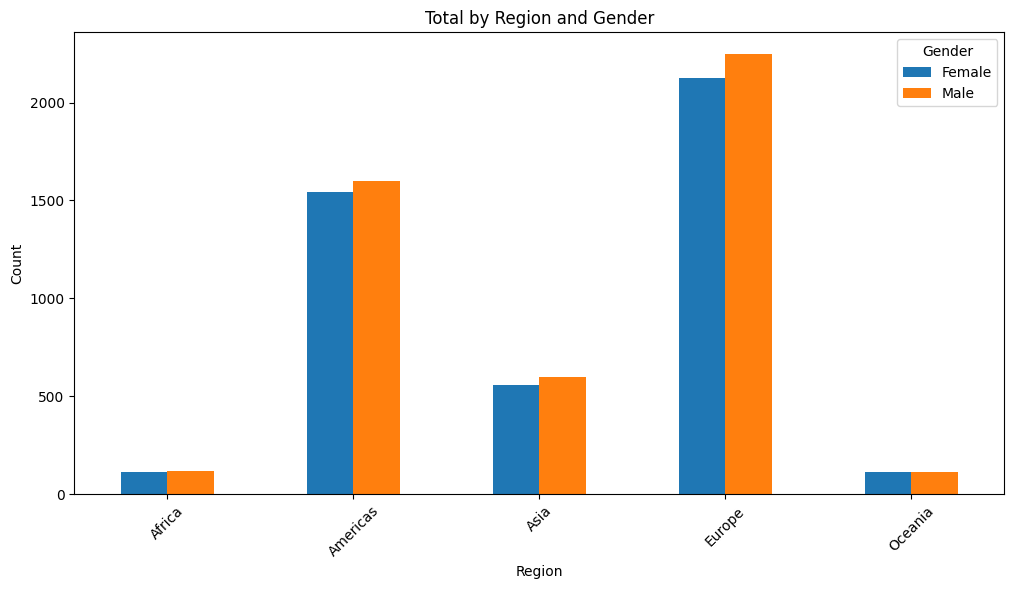

In [ ]:
# List of indicators to filter by
#filterby_indicator = ["Death due to intentional homicide in prison","Persons arrested/suspected for intentional homicide"]
#filterby_indicator = "Persons arrested/suspected for intentional homicide"

# Apply all filters: Unit of measurement 'Counts' and the specified indicators
filtered_df = cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Unit of measurement'] == 'Counts')]

# Group by 'Region' and 'Sex' and count the occurrences
grouped_df = filtered_df.groupby(['Region', 'Sex']).size().unstack()

# Plot the bar chart
grouped_df.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Total by Region and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

*Analysis : Barplot explained regarding the total number of people based on regions Africa, Americas, Asia, Europe, and Oceania for male and female. The obeservation above have indicators of persons arrested/suspected for intentional homicide. The graph shows that Europe has the largest counts. While Africa and Oceania have the smallest, with a nearly balanced male-to-female ratio across regions.*

To analyze persons arrested/suspected for intentional homicide based on age group in Europe. Since Europe has the largest counts in people who has intentational in homicide. Perform Time Analysis

In [ ]:
cleaned_homicide.head(2)

,Country,Region,Indicator,Sex,Age,Year,Unit of measurement,Total
0,Austria,Europe,Victims of intentional homicide,Male,0-9,2010,Counts,1.0
1,Canada,Americas,Victims of intentional homicide,Male,0-9,2010,Counts,20.0


**Homicides by Years**

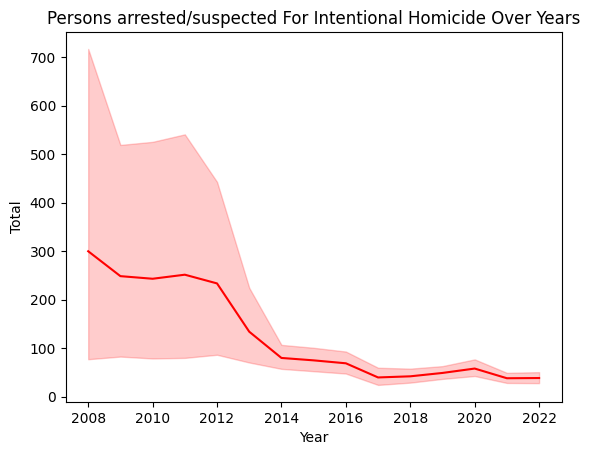

In [ ]:
# loading dataset
data_homicide = cleaned_homicide

# Apply all filters: Unit of measurement 'Counts' and the specified indicators
filtered_data = cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide')]

# draw lineplot
sns.lineplot(x="Year", y="Total", color="red" ,data=filtered_data)
plt.title('Persons arrested/suspected For Intentional Homicide Over Years')
plt.show()

Analysis : This graph shows the total number of person who attempted homicide over the years, from 2008 to 2022. From the graph we can see there is a trend of decrease in the counts of the individuals who were arrested/suspected in homicide, blue line represents the trend in the count of individuals over the years. The light blue shaded region around the line represents the interval or range of variability which shows the possible fluctuation in the totals.

From **2008–2013**: The individuals who suspected for homicide are high in 2008, then the numbers decrease until 2013.

From **2013–2016**: We can see a sharp decrease is noticeable, indicates a significant drop in the number of people attempting homicide.

From **2017–2022**: We can see the line is stabilize at a much lower value (flatten), showing little variation over years.

The graph suggests that the number of attempted homicides has decreased significantly over time, particularly during 2013–2016. The decrease in number of attempt shows the success of policies or interventions aimed at reducing violent crimes.

**Total Individuals of Attempted/Suspected Homicide by Region**

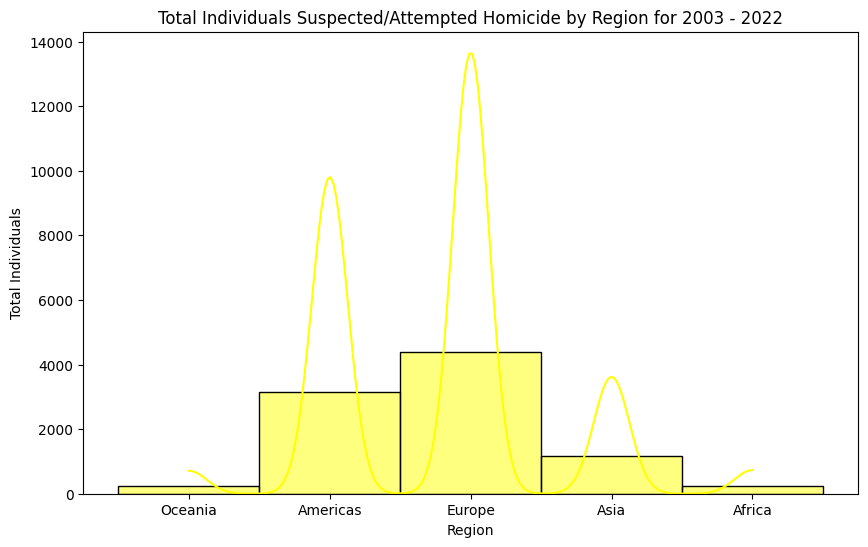

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=filtered_data, x='Region', kde=True, bins=20, color='Yellow')
plt.title('Total Individuals Suspected/Attempted Homicide by Region for 2003 - 2022')
plt.xlabel('Region')
plt.ylabel('Total Individuals')
plt.show()



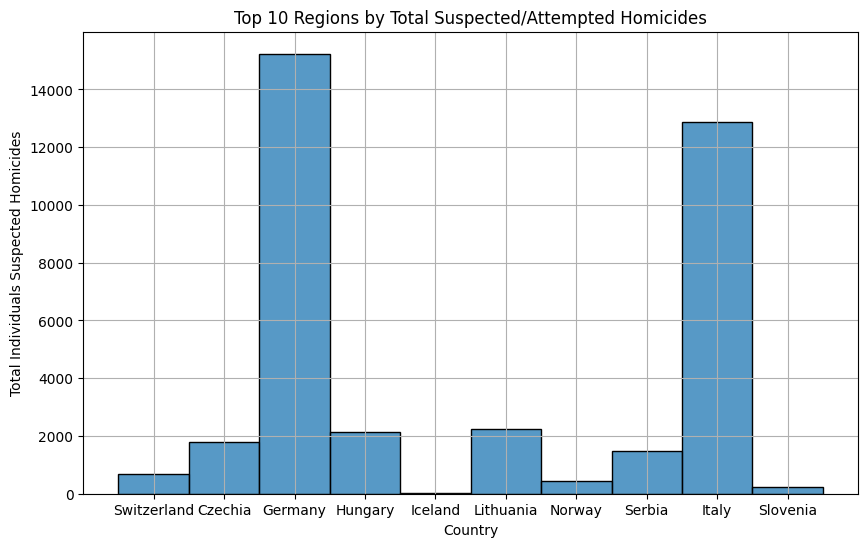

In [ ]:
filteredby_country=cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Region']== 'Europe')     ]


# Calculate the frequency of each region
freq = filteredby_country['Country'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 frequencies
top_10_df = filteredby_country[filteredby_country['Country'].isin(freq.index)]

# Create the histplot for the top 10 frequencies
plt.figure(figsize=(10, 6))
sns.histplot(data=top_10_df, x='Country', weights='Total', discrete=True, multiple="stack")

# Customize the plot
plt.xlabel('Country')
plt.ylabel('Total Individuals Suspected Homicides', rotation=90)
plt.title('Top 10 Regions by Total Suspected/Attempted Homicides')
plt.grid(True)
plt.show()

**Analysis:**
From this plot, we can see that Region from Europe has the highest count of suspected homicides, where this indicates that a higher rate of criminal activity in that area. In contrast, Region Ocenia has the lowest count,related to safer or has fewer reported incidents.

If we see the top 100 of the country that has the largest comitted of attempted murder, Germany has the highest counts of attempts. We can see from the articles in here : [Woman is killed every day](https://www.theguardian.com/commentisfree/2024/dec/09/germany-woman-killed-sexism-violence)

**Total Individuals Attempted/ Suspected Homicide by Age Group**

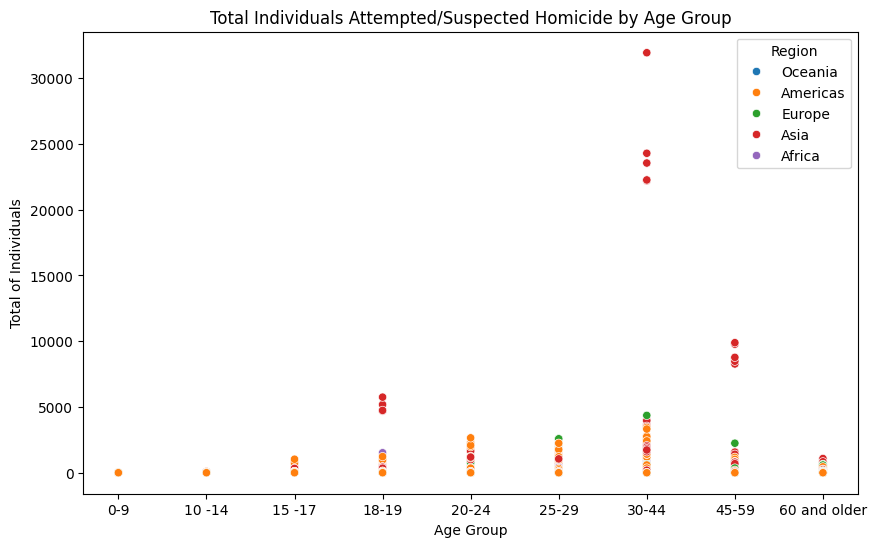

In [ ]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x='Age', y='Total', hue='Region')
plt.ylabel('Total of Individuals')
plt.xlabel('Age Group')
plt.title('Total Individuals Attempted/Suspected Homicide by Age Group')
plt.show()

**Analysis:**
From the scatterplot we can see the youngest age group who attempted to homicide comes from Americas Regions. This is proved by list in [Wikipedia](https://en.wikipedia.org/wiki/List_of_youngest_killers). A red node appear indicates that age group of individuals comes from age of 18 to 59. A list of kids and teenegers who attempted to suicide mostly come from America Region. Please see below pie chart to see which country in America Region have the highest attempted.

**Top 5 country in America Region has the youngest individuals age less 18 years old attempted homicide**

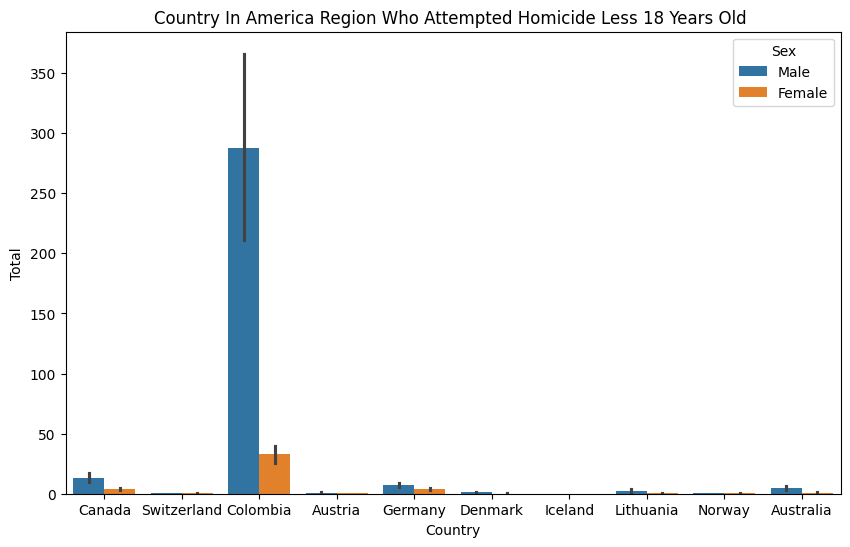

In [ ]:
filteredby_america=cleaned_homicide[(cleaned_homicide['Unit of measurement'] == 'Counts') &
                               (cleaned_homicide['Indicator']== 'Persons arrested/suspected for intentional homicide') &
                               (cleaned_homicide['Region']== 'America') &
                               (cleaned_homicide['Age']== '0-9') |   (cleaned_homicide['Age']== '10 -14') |
                               (cleaned_homicide['Age']== '15 -17')]

# Calculate the frequency of each region
freq = filteredby_america['Country'].value_counts().nlargest(10)

# Filter the DataFrame to include only the top 10 frequencies
top_5_df = filteredby_america[filteredby_america['Country'].isin(freq.index)]

# Create the histplot for the top 10 frequencies
# Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_df, x='Country', y='Total', hue='Sex')
plt.title('Country In America Region Who Attempted Homicide Less 18 Years Old ')
plt.show()

**Analysis:**